In [1]:
#%matplotlib inline
%matplotlib widget
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import os
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, Layout,VBox
import ipywidgets as widgets
from IPython.display import display, Javascript
import math
from sklearn.linear_model import LinearRegression
import csv
from scipy.signal import savgol_filter

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")
#widgets text style
style = {'description_width': 'initial'}

def get_file_list(file_path):
    global file_list
    global file_path0
    
    file_path0 = file_path
    # get file list
    file_list = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    #file_list = ['{0}/{1}'.format(file_path, f) for f in listdir(file_path) if isfile(join(file_path, f))]
    file_list = np.sort(file_list)
    if file_list[0] == '.DS_Store':
        file_list = np.delete(file_list, 0)
        
        
get_file_list('dku_data/05-2022')
new_tests = file_list

interact(get_file_list,
         file_path = widgets.Text(value='dku_data/Serie_DK-Q95-90-1L-C30', description='File path', style = style),
        )    


# def select_files(file_list):
def select_files(file_list):
    checkboxes = [widgets.Checkbox(value=False, description=label, style = style) for label in file_list]
    output = widgets.VBox(children=checkboxes)
    display(output)
    return(checkboxes)

# update
def update_list(t):
    global file_list
    file_list = []
    for i in range(0, len(checkboxes)):
        if checkboxes[i].value == True:
            file_list = file_list + [checkboxes[i].description]
    print(file_list)
    
checkboxes = select_files(file_list)        
button = Button(description="Update file list")
display(button)
button.on_click(update_list)

interactive(children=(Text(value='dku_data/Serie_DK-Q95-90-1L-C30', description='File path', style=Description…

Button(description='Update file list', style=ButtonStyle())

['DK-Q95-90-1L-C30-01.txt', 'DK-Q95-90-1L-C30-09.csv']


In [4]:
plot_range_list = np.zeros(len(file_list))
final_table = np.zeros((len(file_list),3))

In [5]:
# Delect the delimiter from the csv files
def get_delimiter(file_path, bytes = 4096):
    sniffer = csv.Sniffer()
    data = open(file_path, "r").read(bytes)
    delimiter = sniffer.sniff(data).delimiter
    return delimiter

def import_data(f, a_sect, starting_row):
    global data_array
    global headers
    global plot_name
    
    plot_name = os.path.splitext(f)[0]
    file_ext = os.path.splitext(f)[-1]

    
    f = '{0}/{1}'.format(file_path0, f)

    #retrieve the delimiter
    delimiter = get_delimiter(f)
    
    #import data array to be plotted
    data_array = pd.read_table(f,skiprows=range(1,3), delimiter=delimiter, decimal=',', header = 0,  index_col=False)

    #import headers of data
    headers = pd.read_csv(f, nrows=1, delimiter=';').columns.tolist()

    #move force to origin point 
#     data_array.iloc[:,1] = data_array.iloc[:,1] - data_array.iloc[0,1]


#     #add stress according to cross section
#     data_array['Spannung'] = 1000*data_array.iloc[:,1]/a_sect
#     data_array['Dehnung'] = -1000*((data_array.iloc[:,3]+data_array.iloc[:,4]\
#                             +data_array.iloc[:,5]+data_array.iloc[:,6])/4)/295

    
#     headers.append('Spannung')
#     headers.append('Dehnung')


    return(data_array)
    return(headers)
    return(f)

import_data(file_list[0], 0.2,3)


,Zeit 1 - Langsame Messrate [s],Kraft [kN],Weg [mm],Zeit 3 - Langsame Messrate [s],WA1 [mm],WA2 [mm],WA3 [mm]
0,0.4,0.00392,0.00045,0.4,0.0,-0.00011,0.0
1,0.6,0.00423,0.00057,0.6,0.0,-0.00011,0.0
2,0.8,0.00280,0.00070,0.8,0.0,-0.00011,0.0
3,1.0,0.00209,0.00065,1.0,0.0,-0.00012,0.0
4,1.2,0.00172,0.00039,1.2,0.0,-0.00012,0.0
...,...,...,...,...,...,...,...
4533,907.0,0.19390,14.67000,907.0,-18.1,-20.15000,-15.4
4534,907.2,0.19360,14.67000,907.2,-18.1,-20.15000,-15.4
4535,907.4,0.19400,14.67000,907.4,-18.1,-20.15000,-15.4
4536,907.6,0.19450,14.67000,907.6,-18.1,-20.15000,-15.4


In [6]:
def import_geometrical_specs(path):
    
    #retrieve the delimiter
    delimiter = get_delimiter(path)
    
    #import data array to be plotted
    dim_array = pd.read_table(path, delimiter=delimiter, decimal=',', header = 0)

    removetable = str.maketrans('', '', ' _-@#%')
    dim_array['Bezeichnung'] = [s.translate(removetable) for s in dim_array['Bezeichnung']]
    dim_array = dim_array.set_index('Bezeichnung')
    
    return(dim_array)

dim_array = import_geometrical_specs('dku_data/auswertung/dimensions.csv')
dim_array

/var/folders/ty/qmvrc38j54nfv92yrb39ybvr0000gn/T/ipykernel_60869/3531808588.py:15: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  dim_array = import_geometrical_specs('dku_data/auswertung/dimensions.csv')


,a_roving,n_roving,n_textil,l,l_f,b_oben,b_mitte,b_unten,t_oben,t_mitte,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
Bezeichnung,,,,,,,,,,,,,,,,,,,,,
DKQ8501LC3001,1.81,5,1,100.0,40.7,120.0,120.0,119.0,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DKQ8501LC3002,1.81,5,1,100.0,40.6,121.0,119.0,120.0,30.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DKQ8501LC3003,1.81,5,1,100.0,40.8,119.0,119.0,120.0,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DKQ8501LC3004,1.81,5,1,100.1,41.0,122.0,120.0,120.0,30.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DKQ8501LC3005,1.81,5,1,100.2,41.1,121.0,119.0,120.0,31.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DKQ95902LC3050,3.62,6,2,100.0,41.0,121.0,121.0,120.0,29.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DKQ95902LC3051,3.62,6,2,100.0,NaN,121.0,120.0,121.0,28.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DKQ95902LC3052,3.62,6,2,100.0,41.3,120.0,120.0,120.0,31.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def import_data(f, starting_row):
    global data_array
    global headers
    global plot_name
    global file_ext
    global c_sect
    
    plot_name = os.path.splitext(f)[0]
    file_ext = os.path.splitext(f)[-1]

    
    f = '{0}/{1}'.format(file_path0, f)

    #retrieve the delimiter
    delimiter = get_delimiter(f)
    
    #import data array to be plotted
    data_array = pd.read_table(f,skiprows=range(1,3), delimiter=delimiter, decimal=',', header = 0,  index_col=False)

    #import headers of data
    headers = pd.read_csv(f, nrows=1, delimiter=';').columns.tolist()
    
    #move force to origin point #check this with arne
#     data_array.iloc[:,1] = data_array.iloc[:,1] - data_array.iloc[0,1]
 
    # get memasurements array
    removetable = str.maketrans('', '', ' _-@#%')
    gem_data = dim_array.loc[str.upper(plot_name.translate(removetable))]  

    #get the cross section
    c_sect = gem_data['n_roving'] * gem_data['a_roving']
        
    prob_list = np.array(['DK-Q95-0-1L-C30-01', 'DK-Q95-0-1L-C30-02',
                          'DK-Q95-0-1L-C30-03', 'DK-Q95-0-1L-C30-04', 'DK-Q95-0-1L-C30-05',
                          'DK-Q95-90-1L-C30-01', 'DK-Q95-90-1L-C30-02',
                          'DK-Q95-90-1L-C30-03', 'DK-Q95-90-1L-C30-04', 'DK-Q95-90-1L-C30-05'])    
    
    if plot_name in prob_list:
        
        #wa headers array for plotting
        wa_headers = np.array(['WA1 [mm]', 'WA2 [mm]', 'WA3 [mm]'])
        
         # get the measured length 
        avg_length = (gem_data['l0_wa-vl']+gem_data['l0_wa-vr']+gem_data['l0_wa-hl'])/3
        
        
        max_index = np.argmax(abs(data_array.iloc[:,1]))
        
        #detect falling of transducer before breaking
        mx_ind_arr = np.zeros(len(wa_headers))
        for i in range(0, len(wa_headers)):
            diff_arr = abs(np.array(data_array[wa_headers[i]][1:]) - np.array(data_array[wa_headers[i]][:-1]))

            if data_array[wa_headers[i]].isnull().values.any() and data_array[wa_headers[i]].last_valid_index() != len(data_array[wa_headers[i]])-1:
                mx_ind_arr[i] = data_array[wa_headers[i]].last_valid_index()
            else:
                mx_ind_arr[i] = np.argmax(diff_arr) - 10
        
        order_array = np.append(mx_ind_arr, max_index).astype(int)
        order_array = np.vstack((order_array, np.append(wa_headers, 'Max')))
        order_array = order_array[:,order_array[0, :].astype(int).argsort()]
        print(order_array)
        order_max = np.where(order_array == 'Max')[-1][0]
        
        for i in range(0,order_max):
            data_array[order_array[1,i]][int(order_array[0,i]):] = np.nan      

        
        avg_verf = data_array[['WA1 [mm]', 'WA2 [mm]', 'WA3 [mm]']].mean(axis = 1)                
        
        #add stress according to cross section
        data_array['Spannung'] = 1000*data_array.iloc[:,1]/c_sect
        data_array['Dehnung'] = -1000*avg_verf/avg_length
        
        #correct the strain for the contribution of the fallen tranducers
        for i in range(0,order_max):
            data_array['Dehnung'][int(order_array[0,i]):] = data_array['Dehnung'][int(order_array[0,i]):] \
            + (data_array['Dehnung'][int(order_array[0,i])-1] - data_array['Dehnung'][int(order_array[0,i])])  
        
    elif plot_name + '.txt' in new_tests:
                #wa headers array for plotting
        wa_headers = np.array(['WA_blau [mm]', 'WA_gelb [mm]'])
        
         # get the measured length 
        avg_length = (gem_data['l0_wa-hl']+gem_data['l0_wa-hr'])/2
        
        max_index = np.argmax(abs(data_array.iloc[:,1]))
        
        #detect falling of transducer before breaking
        mx_ind_arr = np.zeros(len(wa_headers))
        for i in range(0, len(wa_headers)):
            diff_arr = abs(np.array(data_array[wa_headers[i]][100:]) - np.array(data_array[wa_headers[i]][99:-1]))

            if data_array[wa_headers[i]].isnull().values.any() and data_array[wa_headers[i]].last_valid_index() != len(data_array[wa_headers[i]])-1:
                mx_ind_arr[i] = data_array[wa_headers[i]].last_valid_index()
            else:
                mx_ind_arr[i] = np.argmax(diff_arr) - 10
                
        order_array = np.append(mx_ind_arr, max_index).astype(int)
        order_array = np.vstack((order_array, np.append(wa_headers, 'Max')))
        order_array = order_array[:,order_array[0, :].astype(int).argsort()]
        print(order_array)
        order_max = np.where(order_array == 'Max')[-1][0]
        
        for i in range(0,order_max):
            data_array[order_array[1,i]][int(order_array[0,i]):] = np.nan      

        
        avg_verf = data_array[['WA_blau [mm]', 'WA_gelb [mm]']].mean(axis = 1)                
        
        #add stress according to cross section
        print(data_array.iloc[:,1])
        data_array['Spannung'] = 1000*data_array.iloc[:,1]/c_sect
        data_array['Dehnung'] = -1000*avg_verf/avg_length

        
        #correct the strain for the contribution of the fallen tranducers
        for i in range(0,order_max):
            data_array['Dehnung'][int(order_array[0,i]):] = data_array['Dehnung'][int(order_array[0,i]):] \
            + (data_array['Dehnung'][int(order_array[0,i])-1] - data_array['Dehnung'][int(order_array[0,i])])  
    else:
        
        #wa headers array for plotting
        wa_headers = np.array(['WA_vo_re', 'WA_vo_li', 'WA_hi_li', 'WA_hi_re'])
        
         # get the measured length 
        avg_length = (gem_data['l0_wa-vl']+gem_data['l0_wa-vr']+gem_data['l0_wa-hl']+gem_data['l0_wa-hr'])/4
        
        max_index = np.argmax(abs(data_array.iloc[:,1]))
        
        mx_ind_arr = np.zeros(len(wa_headers))
        for i in range(0, len(wa_headers)):
            diff_arr = abs(np.array(data_array[wa_headers[i]][1:]) - np.array(data_array[wa_headers[i]][:-1]))
            if data_array[wa_headers[i]].isnull().values.any() and data_array[wa_headers[i]].last_valid_index() != len(data_array[wa_headers[i]])-1:
                mx_ind_arr[i] = data_array[wa_headers[i]].last_valid_index()
            else:
                mx_ind_arr[i] = np.argmax(diff_arr) - 10
                
        
        order_array = np.append(mx_ind_arr, max_index).astype(int)
        order_array = np.vstack((order_array, np.append(wa_headers, 'Max')))
        order_array = order_array[:,order_array[0, :].astype(int).argsort()]
        print(order_array)
        order_max = np.where(order_array == 'Max')[-1][0]
        
        for i in range(0,order_max):
            data_array[order_array[1,i]][int(order_array[0,i]):] = np.nan        
                        
        
        avg_verf = data_array[['WA_vo_re', 'WA_vo_li', 'WA_hi_re', 'WA_hi_li']].mean(axis = 1)
        
        #add stress according to cross section
        data_array['Spannung'] = 1000*data_array.iloc[:,1]/c_sect
        data_array['Dehnung'] = -1000*avg_verf/avg_length
        
        
#         correct the strain for the contribution of the fallen tranducers
        for i in range(0,order_max):
            data_array['Dehnung'][int(order_array[0,i]):] = data_array['Dehnung'][int(order_array[0,i]):] \
            + (data_array['Dehnung'][int(order_array[0,i])-1] - data_array['Dehnung'][int(order_array[0,i])])

            
        
    
    headers.append('Spannung')
    headers.append('Dehnung')
    
    
    #reverse negative regime
    if np.mean(data_array['Spannung'][:int(np.floor(len(data_array)/2))]) < 0:
        data_array['Spannung'] = -data_array['Spannung']
    if np.mean(data_array['Dehnung'][:int(np.floor(len(data_array)/2))]) < 0:
        data_array['Dehnung'] = -data_array['Dehnung']
   

    return(data_array, headers, wa_headers, avg_length)
#     return(headers)
#     return(wa_headers)
#     return(f)


#plotting function
def plotter(data_range, x, y, units_x, units_y, grid_x_spacing, grid_y_spacing):
    global fig1
    global plot_range_list
    
    plt.close()
    
    #save the range of the plot
    plot_range_list[np.array(file_list) == plot_name + '.csv'] = data_range
    
    max_index = np.argmax(data_array[y])
    plot_range = data_array[x][max_index]
    
    #for i in range(max_index,len(data_array[x])):
        #if data_array[y][i] - data_array[y][max_index] < -200 or data_array[x][i] > 20:
            #plot_range = data_array[x][i]
            #max_index = i + 1
            #break

    
#     max_index = (np.abs(data_array[x] - plot_range)).argmin()
    
    #font family for the plots
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.it'] = 'Arial Narrow:bold:italic'
    #plt.rcParams['mathtext.bf'] = 'Arial:bold:italic'
    
    cm = 1/2.54
    fig1 = plt.figure(figsize=(7.88*cm, 6.275*cm), dpi=300)
    x_plot = data_array[x][:max_index]
    y_plot = data_array[y][:max_index]
    last_valid_ind = x_plot.last_valid_index()

    
    # plot the wa seperately
    for i in range(0,len(wa_headers)):
        plt.plot(1000*abs(data_array[wa_headers[i]][:max_index])/avg_length, y_plot, color='grey',linewidth=0.3
            )    
    
    
    b_point_index = np.argmax(data_array[y]) - 1
    x_bpoint = data_array[x][b_point_index]
    y_bpoint = data_array[y][b_point_index]
    
    
    #multiplier for the breaking point in the summary table
    b_mult = 1    
    
    #plot breaking point
    plt.vlines(x = x_bpoint, ymin = 0, ymax = y_bpoint,
           colors = 'grey', linestyle='dashed')
    
    #plot text
    plt.text(x_bpoint - 3, 50,  round(x_bpoint,1) , fontsize=10)
    plt.text(0.25, y_bpoint+50,  round(y_bpoint) , fontsize=10)
    plt.plot(np.array([0,x_bpoint]), 
             np.array([y_bpoint, y_bpoint]),
            color='grey', linestyle='dashed')  
    
    cont_line_x = []
    cont_line_y = []

    # plot theoretical continuation
    if x_bpoint != x_bpoint:
        nan_ind = np.array(data_array.loc[pd.isna(data_array[x]), :].index)[0]
        #print(data_array[x])
        #print(b_point_index)
        #linear regression
        p_coeff = np.polyfit(x_plot[nan_ind-1000:nan_ind], y_plot[nan_ind-1000:nan_ind], 1)
        rep_coord = (y_plot[nan_ind:b_point_index] - p_coeff[1])/p_coeff[0]
        plt.plot(rep_coord, y_plot[nan_ind:b_point_index], color='black',linewidth=1.5, linestyle='dotted')
        cont_line_x = rep_coord
        cont_line_y = y_plot[nan_ind:b_point_index]
        est_x_bpoint = rep_coord.iloc[-1] 
        
        #multiplier for the breaking point in the summary table
        b_mult = 0
        
        #replot text
        plt.text(0.25, y_bpoint+50,  round(y_bpoint) , fontsize=10)
        
        plt.plot(np.array([0,est_x_bpoint]), 
                 np.array([y_bpoint, y_bpoint]),
                color='grey', linestyle='dashed')
        
        #plot breaking point
        x_bpoint = rep_coord.iloc[-1]
        plt.vlines(x = x_bpoint, ymin = 0, ymax = y_bpoint, colors = 'grey', linestyle='dashed')  
        if max(rep_coord) - min(rep_coord) < 2.5:
            
            #multiplier for the breaking point in the summary table
            b_mult = 1
        
            #plot text
            plt.text(x_bpoint - 3, 50,  round(x_bpoint,1) , fontsize=11)
            
            #add cosmetic drop
            x_cos = np.array([x_plot.iloc[last_valid_ind], x_plot.iloc[last_valid_ind]+2.5])
            y_cos = np.array([y_plot.iloc[last_valid_ind], y_plot.iloc[last_valid_ind]-500]) 
            
            x_plot = np.append(np.array(x_plot)[:last_valid_ind], x_cos)
            y_plot = np.append(np.array(y_plot)[:last_valid_ind], y_cos)            
            
    else:        
            #add cosmetic drop
            x_cos = np.array([x_plot.iloc[last_valid_ind], x_plot.iloc[last_valid_ind]+2.5])
            y_cos = np.array([y_plot.iloc[last_valid_ind], y_plot.iloc[last_valid_ind]-500])     
            #plt.plot(x_cos, y_cos, color='black',linewidth=1.5)
            
            x_plot = np.append(np.array(x_plot)[:last_valid_ind], x_cos)
            y_plot = np.append(np.array(y_plot)[:last_valid_ind], y_cos)
            
    plt.plot(x_plot, y_plot, color='black',linewidth=1.5)       
    
    #formatting
    x_label = r'$\mathbf{Dehnung}$ $\mathit{\epsilon}\mathbf{_{t}}$' + r" $\mathbf{{[{0}]}}$".format(units_x)
    y_label = r'$\mathbf{Spannung}$ $\mathit{\sigma}\mathbf{_{t}}$'  + r" $\mathbf{{[{0}]}}$".format(units_y)
    plt.xlabel(x_label, fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.grid(visible='Yes', which='major', axis='both', color='black', linewidth=0.5)
    plt.xlim([0,20])
    plt.xticks(np.arange(0, 20+grid_x_spacing/2, grid_x_spacing),fontsize=10)
    #plt.xticks(fontsize=13)
    plt.ylim([0,5000])
    plt.yticks(np.arange(0, 4500+grid_y_spacing/2, grid_y_spacing),fontsize=10)
    #plt.yticks(fontsize=13)
    #plt.rcParams['axes.formatter.use_locale'] = True
    
    #save plot
    plot_array = np.vstack((x_plot,y_plot)).T
    plot_array_cont = np.vstack((cont_line_x, cont_line_y)).T
    path_to_plots = file_path0 + '/plots_data/'
    if not os.path.exists(path_to_plots):
        os.makedirs(path_to_plots)
        
    np.savetxt(path_to_plots + plot_name + '.txt', plot_array)
    np.savetxt(path_to_plots + plot_name + '_cont.txt', plot_array_cont)
    
    #save original plot
    plot_array = np.vstack((data_array[x],data_array[y])).T
    path_to_plots = file_path0 + '/original_plots/'
    if not os.path.exists(path_to_plots):
        os.makedirs(path_to_plots)
        
    np.savetxt(path_to_plots + plot_name + '.txt', plot_array) 
    
    #get the current file index
    curr_ind = np.where(np.array(file_list) == plot_name + file_ext)

    final_table[curr_ind,0] = y_bpoint*c_sect/1000
    final_table[curr_ind,1] = y_bpoint
    final_table[curr_ind,2] = b_mult*x_bpoint
  
    plt.tight_layout()
    plt.show()


def save_fig_button(t):
    global plot_name
    if not os.path.exists('plots'):
        os.makedirs('plots')
    plot_name = file_path0 + '/' + plot_name + '.svg'
    fig1.savefig(plot_name, dpi=1200, bbox_inches =
                'tight')

[['3643' '3652' '3677' '4320']
 ['WA2 [mm]' 'WA1 [mm]' 'Max' 'WA3 [mm]']]


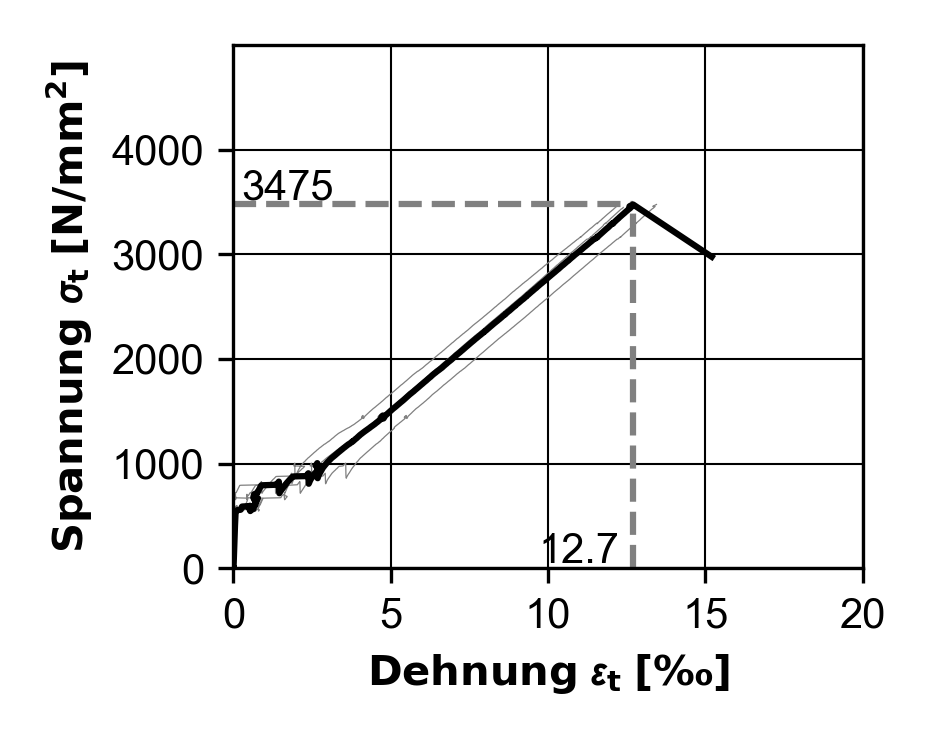

/var/folders/ty/qmvrc38j54nfv92yrb39ybvr0000gn/T/ipykernel_60869/880600830.py:16: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(file_path0 + '/' + 'summary' +'.xls')


,Bruchkraft,Bruchspannung,Bruchdehnung
DK-Q95-90-1L-C30-01.txt,37.74,3475.14,12.70
DK-Q95-90-1L-C30-09.csv,41.66,3836.47,9.14


In [16]:
# %capture
for i in range(0,1):
    data_array, headers, wa_headers, avg_length = import_data(file_list[i], 0)
    
    plotter(0, 'Dehnung', 'Spannung', '‰', 'N/mm^{2}', 5, 1000)
        
    save_fig_button(0)
data_array
final_table = final_table.astype(float)

df = pd.DataFrame(data=final_table, index=file_list, columns=['Bruchkraft', 'Bruchspannung', 'Bruchdehnung'])
df = df.round(2)

#df.to_csv(path_or_buf=file_path0+plot_name+'.csv', sep=',', float_format=None, header=True, index=True,
                 #,decimal=',')
df.to_excel(file_path0 + '/' + 'summary' +'.xls')
df    
        

### 